In [6]:
#Prepare the environment by importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [7]:
#Load the dataset
Iris_data= pd.read_csv(r'C:\Users\user\Downloads\Iris.csv')
Iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
#Eplore the data
Iris_data.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [11]:
#Checking for missing values
Iris_data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
#Seperate the features('y') and target variables('x')
x= Iris_data.drop(columns=['Species'])
y= Iris_data['Species']

In [14]:
#Encoding the categorical target variables
data_dummy = Iris_data.copy()
data_dummy['Species']= data_dummy['Species'].map({'Iris-setosa':0, 'Iris-virginica':1, 'Iris-versicolor':2})
data_dummy

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,1
146,147,6.3,2.5,5.0,1.9,1
147,148,6.5,3.0,5.2,2.0,1
148,149,6.2,3.4,5.4,2.3,1


In [17]:
#Splitting data into train and test test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size= 0.3, random_state=42)

In [16]:
#Train a Model
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
#Check model's performance on test data
from sklearn.metrics import accuracy_score, classification_report


In [20]:
#Make predictions
y_hat= model.predict(x_test)
#Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_hat))
print('Classification Report:\n', classification_report(y_test, y_hat))

Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [24]:
#Evaluating the model on training data: This is to check for over or underfitting
y_train_hat= model.predict(x_train)
train_accuracy= accuracy_score(y_train, y_train_hat)
train_accuracy

1.0

<function matplotlib.pyplot.show(close=None, block=None)>

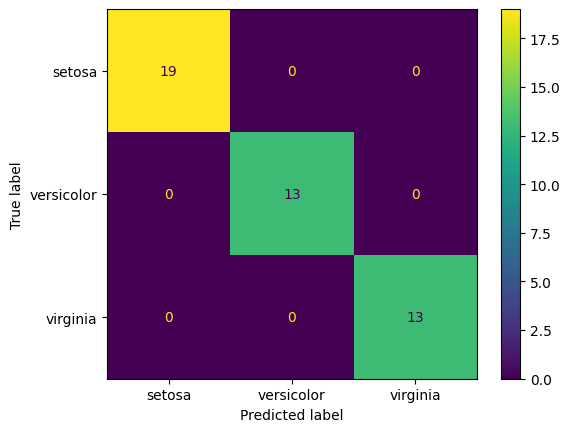

In [23]:
#Prediction Visualization
from sklearn.metrics import ConfusionMatrixDisplay
#Confusionn Matrix
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, display_labels=['setosa', 'versicolor','virginia'])
plt.show

In [26]:
#Testing the model
newiris_data= [[146,6.7,3.0,5.2,2.3]]
New_prediction= model.predict(newiris_data)
New_prediction

C:\Users\user\anaconda3\envs\notebook\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Iris-virginica'], dtype=object)